# Setup

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import sys
sys.path.append("../../..")
results_folder = "../../../reports/random_walks/"

# Load data

In [75]:
keep = ['hidden_channels', 'conv_type', 'micro_aggregation','macro_aggregation', 'layer_connectivity', 'L2_norm','pre_process_layers', 'msg_passing_layers', 'post_process_layers','normalize_output', 'jumping_knowledge', 'feature_dim', 'feature_type',"mean_auc","std"]
walk_1_results = pd.read_csv(results_folder+"walk_1/random_walk_results.csv",index_col=0)[keep].fillna(0)
walk_2_results = pd.read_csv(results_folder+"walk_2/random_walk_results.csv",index_col=0)[keep].fillna(0)


In [9]:
walk_1_results.sort_values(by="mean_auc",ascending=False)[:10]

,hidden_channels,conv_type,micro_aggregation,macro_aggregation,layer_connectivity,L2_norm,pre_process_layers,msg_passing_layers,post_process_layers,normalize_output,jumping_knowledge,feature_dim,feature_type,mean_auc,std
41,64,SAGEConv,mean,mean,NaN,False,1,3,2,False,True,16,lsa,0.8652,0.003600
42,64,SAGEConv,mean,mean,NaN,False,1,4,2,False,True,16,lsa,0.8652,0.002993
43,64,SAGEConv,mean,mean,NaN,False,1,4,1,False,True,16,lsa,0.8646,0.009687
40,64,SAGEConv,mean,mean,NaN,False,2,3,2,False,True,16,lsa,0.8612,0.005036
39,64,SAGEConv,mean,mean,NaN,False,2,3,2,False,False,16,lsa,0.8602,0.006145
38,64,SAGEConv,mean,sum,NaN,False,2,3,2,False,False,16,lsa,0.8588,0.007194
18,32,SAGEConv,sum,sum,NaN,True,1,3,2,False,False,32,random_xavier,0.7194,0.041836
15,64,SAGEConv,sum,sum,NaN,True,1,2,2,False,True,32,random_xavier,0.7026,0.041447
21,32,GATConv,mean,mean,NaN,True,1,3,2,False,False,32,random_xavier,0.7012,0.002786
17,32,SAGEConv,mean,sum,NaN,True,1,3,2,False,False,32,random_xavier,0.6962,0.015302


In [10]:
walk_2_results.sort_values(by="mean_auc",ascending=False)[:10]


,hidden_channels,conv_type,micro_aggregation,macro_aggregation,layer_connectivity,L2_norm,pre_process_layers,msg_passing_layers,post_process_layers,normalize_output,jumping_knowledge,feature_dim,feature_type,mean_auc,std
2,64,SAGEConv,mean,mean,skipsum,False,0,3,2,False,True,16,lsa_scaled,0.8864,0.003007
49,64,SAGEConv,max,mean,skipsum,True,0,4,2,False,True,16,lsa_scaled,0.8840,0.003742
20,64,SAGEConv,sum,sum,NaN,True,0,4,2,False,True,16,lsa_scaled,0.8822,0.005706
19,64,SAGEConv,sum,max,NaN,True,0,4,2,False,True,16,lsa_scaled,0.8816,0.003980
1,64,SAGEConv,mean,mean,NaN,False,0,3,2,False,True,16,lsa_scaled,0.8812,0.003250
48,64,SAGEConv,max,mean,skipsum,False,0,4,2,False,True,16,lsa_scaled,0.8812,0.003250
51,64,SAGEConv,max,sum,skipsum,True,2,4,2,False,True,16,lsa_scaled,0.8766,0.002059
6,64,SAGEConv,mean,mean,NaN,False,0,2,1,False,False,32,lsa_scaled,0.8726,0.002577
50,64,SAGEConv,max,mean,skipsum,True,2,4,2,False,True,16,lsa_scaled,0.8704,0.005851
11,64,SAGEConv,max,sum,skipsum,False,0,2,2,False,False,32,lsa_scaled,0.8678,0.003816


In [76]:
walk_2_results["walk"] = 2
walk_1_results["walk"] = 1 
total_walk = pd.concat([walk_1_results,walk_2_results]).reset_index(names="walk_index")
total_walk

,walk_index,hidden_channels,conv_type,micro_aggregation,macro_aggregation,layer_connectivity,L2_norm,pre_process_layers,msg_passing_layers,post_process_layers,normalize_output,jumping_knowledge,feature_dim,feature_type,mean_auc,std,walk
0,0,32,SAGEConv,mean,sum,0,True,0,2,0,False,False,16,random_xavier,0.5988,0.010907,1
1,1,32,SAGEConv,mean,sum,0,True,0,2,0,False,False,16,ones,0.6312,0.006853,1
2,2,32,SAGEConv,mean,max,0,True,0,2,0,False,False,16,ones,0.6436,0.042580,1
3,3,32,SAGEConv,mean,max,0,True,0,2,0,True,False,16,ones,0.6680,0.017788,1
4,4,32,SAGEConv,mean,max,skipsum,True,0,2,2,True,False,16,ones,0.6682,0.019240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,53,64,SAGEConv,sum,sum,skipsum,True,2,4,0,False,True,16,lsa_scaled,0.7662,0.018936,2
98,54,64,SAGEConv,sum,sum,0,True,2,4,0,False,True,16,lsa_scaled,0.8190,0.010296,2
99,55,64,SAGEConv,sum,sum,0,True,0,4,0,False,True,16,lsa_scaled,0.8472,0.004707,2
100,56,32,SAGEConv,sum,sum,0,True,0,4,0,False,True,16,lsa_scaled,0.8198,0.007652,2


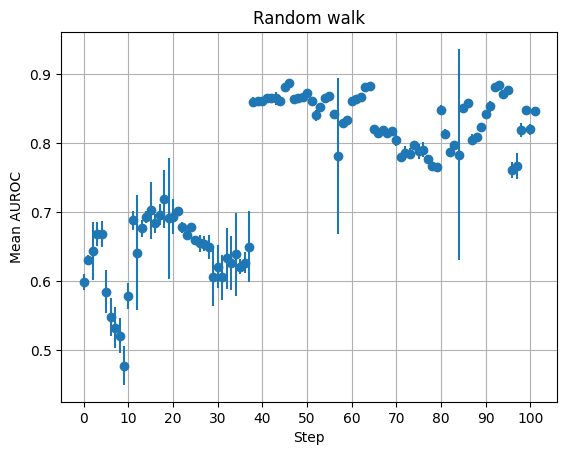

In [29]:
auc_chain = total_walk.mean_auc.values
std_chain = total_walk["std"].values
plt.errorbar(np.arange(len(auc_chain)), auc_chain, std_chain, fmt="o")
plt.title("Random walk")
plt.xticks(np.arange(0, len(auc_chain), 10))
plt.xlabel("Step")
plt.ylabel("Mean AUROC")
plt.grid(True)

In [34]:
fig = px.scatter(total_walk,y="mean_auc",error_y="std")
fig.show()

In [41]:
total_walk.loc[57].compare(total_walk.loc[58])

,self,other
walk_index,13,14
micro_aggregation,max,mean
mean_auc,0.7808,0.829
std,0.112982,0.004336


In [40]:
total_walk.loc[57].compare(total_walk.loc[56])

,self,other
walk_index,13,12
pre_process_layers,2,0
mean_auc,0.7808,0.8428
std,0.112982,0.003919


In [35]:
total_walk.loc[57]

walk_index                     13
hidden_channels                32
conv_type                SAGEConv
micro_aggregation             max
macro_aggregation             sum
layer_connectivity        skipsum
L2_norm                     False
pre_process_layers              2
msg_passing_layers              2
post_process_layers             2
normalize_output            False
jumping_knowledge           False
feature_dim                    32
feature_type           lsa_scaled
mean_auc                   0.7808
std                      0.112982
walk                            2
Name: 57, dtype: object

In [44]:
total_walk.loc[46].compare(total_walk.loc[47])

,self,other
walk_index,2,3
pre_process_layers,0,2
mean_auc,0.8864,0.864
std,0.003007,0.001789


In [57]:
total_walk.loc[84]

walk_index                     40
hidden_channels                32
conv_type                SAGEConv
micro_aggregation             sum
macro_aggregation             max
layer_connectivity            NaN
L2_norm                      True
pre_process_layers              2
msg_passing_layers              3
post_process_layers             2
normalize_output            False
jumping_knowledge           False
feature_dim                    32
feature_type           lsa_scaled
mean_auc                   0.7832
std                      0.153136
walk                            2
Name: 84, dtype: object

In [70]:
dims = {}
for dim in total_walk.columns:
    if dim not in ["walk_index","mean_auc","std","walk"]:
        dims[dim] = total_walk[dim].value_counts().to_dict()

dims

{'hidden_channels': {32: 55, 64: 47},
 'conv_type': {'SAGEConv': 91, 'GATConv': 11},
 'micro_aggregation': {'mean': 49, 'sum': 31, 'max': 22},
 'macro_aggregation': {'mean': 39, 'sum': 34, 'max': 29},
 'layer_connectivity': {'skipsum': 41},
 'L2_norm': {True: 66, False: 36},
 'pre_process_layers': {0: 47, 1: 32, 2: 23},
 'msg_passing_layers': {3: 40, 4: 36, 2: 26},
 'post_process_layers': {2: 56, 0: 36, 1: 10},
 'normalize_output': {False: 77, True: 25},
 'jumping_knowledge': {True: 55, False: 47},
 'feature_dim': {32: 50, 16: 47, 64: 5},
 'feature_type': {'lsa_scaled': 58, 'random_xavier': 28, 'ones': 10, 'lsa': 6}}

In [86]:
fig = px.scatter(total_walk,y="mean_auc",error_y="std",color="msg_passing_layers")
fig.show()

In [87]:
param = "msg_passing_layers"
total_walk[param].value_counts()

3    40
4    36
2    26
Name: msg_passing_layers, dtype: int64

In [98]:
for param in total_walk.columns:
    if param not in ["walk_index","mean_auc","std","walk"]:
        fig = px.box(total_walk[[param,"mean_auc"]], x=param,y="mean_auc")
        fig.show()